In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import os

In [3]:
def calc_step(d):
    return np.sqrt(4 * d * 2)

def convert_d_from_nm2_ns_to_cm2_s(d: float):
    return d * 1e-14 / 1e-9

def convert_d_from_cm2_s_to_nm2_ns(d: float):
    return d * 1e-9 / 1e-14

<AxesSubplot:xlabel='time'>

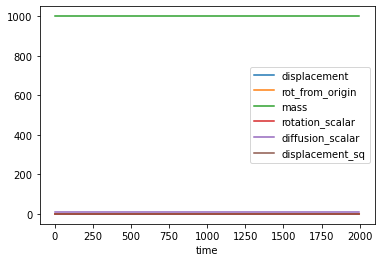

In [41]:
%matplotlib inline

file_str = "src\\grana_model\\res\log\\29062022_displacement_data.csv"

filename = f"{pathlib.Path.cwd()}/{file_str}"

if os.path.exists(filename):
    df = pd.read_csv(filename)
else:
    print(f"{filename} does not exist")

df["displacement_sq"] = df["displacement"]**2

df[df['diffusion_scalar'] == 10.0].groupby("time").mean().plot()
df[df['diffusion_scalar'] == 10000.0].groupby("time").mean()['displacement_sq'].plot()
 




In [ ]:

lm_time = np.arange(0, 2000)

line_y = np.linspace(0, np.max(mean_df["displacement_sq"]), 2000)

lm = np.poly1d(np.polyfit(df["time"], df["displacement_sq"], 1))

# calculate d from the data
d = lm.coef[0]

step_nm = calc_step(d)
d_text = f"meas D = {round(convert_d_from_nm2_ns_to_cm2_s(d), 10)}"
exp_text = f"exp D = {1.88 * 1e-9}" # 1.88 * 1e-9 cm2/s
step_text = f"step_nm = {round(step_nm, 5)} nm"

print(d_text)
print(exp_text)
print(step_text)


ValueError: setting an array element with a sequence.

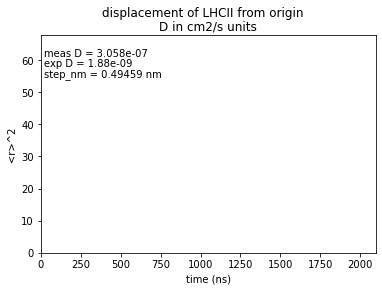

In [76]:

# plot the displacement_sq against the fit

plt.suptitle("displacement of LHCII from origin")
plt.title("D in cm2/s units")
plt.xlabel("time (ns)")
plt.ylabel("<r>^2")
plt.xlim(0, np.max(df["time"]) * 1.05)
plt.ylim(0, np.max(mean_df["displacement_sq"]) * 1.05)
plt.annotate(text=d_text, xy=(20, np.max(mean_df["displacement_sq"]) * 0.95))
plt.annotate(text=step_text, xy=(20, np.max(mean_df["displacement_sq"]) * 0.85))
plt.annotate(text=exp_text, xy=(20, np.max(mean_df["displacement_sq"]) * 0.90))
plt.plot(mean_df["displacement_sq"])
plt.plot(lm(lm_time))

In [7]:
d0 = 0.00018 # d0 in nm2/ns

d1 = convert_d_from_nm2_ns_to_cm2_s(d0) # convert to cm2/s units

d2 = convert_d_from_cm2_s_to_nm2_ns(d1) # convert the cm2/s units back to nm2/ns units

print(f"d0==d2 is {d0 == d2}")

step_nm = calc_step(d0)

step_cm = calc_step(d1)

print(f"d0: {d0}, d1: {d1}, d2: {d2}")

print(f"nm/ns step: {step_nm}")

print(f"cm/s step: {step_cm}")


d0==d2 is True
d0: 0.00018, d1: 1.8e-09, d2: 0.00018
nm/ns step: 0.03794733192202055
cm/s step: 0.00012
